Compare Reliability Cases and Assumptions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
link = "Video"
modulation = "QAM16"

# Load the CSVs
simulated_1_df = pd.read_csv("/home/research-student/omnetpp_sim_results/PCAP_Test/DJIMavicAir_Simplified_1/DJIMavicAir_Simplified_1_NoDelayExcd_{}_Reliability.csv".format(link))
simulated_2_df = pd.read_csv("/home/research-student/omnetpp_sim_results/PCAP_Test/DJIMavicAir_ConstantSI/DJIMavicAir_ConstantSI_NoDelayExcd_{}_Reliability.csv".format(link))

simulated_1_df = simulated_1_df.loc[simulated_1_df["Modulation"]==modulation].copy()
simulated_2_df = simulated_2_df.loc[simulated_2_df["Modulation"]==modulation].copy()

h_dist_1 = simulated_1_df["Horizontal_Distance"].values
reliability_1 = (simulated_1_df["Num_Reliable"] / simulated_1_df["Num_Sent"]).values
h_dist_2 = simulated_2_df["Horizontal_Distance"].values
reliability_2 = (simulated_2_df["Num_Reliable"] / simulated_2_df["Num_Sent"]).values

plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.plot(h_dist_1, reliability_1, '-o', c="tab:blue", linewidth=4)
plt.plot(h_dist_2, reliability_2, '-o', c="tab:orange", linewidth=2)
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Simulated Reliability")
plt.legend(["Simulated with Assumptions", "DJI Mavic Air Packets, GCS Sending Interval: 10ms"], loc='upper right')
plt.title("Video")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.plot(np.arange(4)+1, [170.0, 360.0, 450.0, 460.0], '-o', c="tab:blue", linewidth=4)
plt.xlabel("Max Horizontal Distance (m)")
plt.ylabel("UAV Sending Interval (ms)")
plt.xticks(np.arange(4)+1, ("10", "20", "66.7", "100"))
# plt.legend(["Simulated Reliability"], loc='lower left')
plt.title("Max Horizontal Distance vs UAV Sending Interval")

Plot MDP Results

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# link = "Video"
# Load the CSVs
mdp_sim = pd.read_csv("/home/research-student/omnet-fanet/data-processing-scripts/mdp_policy/constant_usi_100ms_policy.csv")
mdp_sim.sort_values(["Horizontal_Distance"], inplace=True)

# Plot DL Reliability
h_dist = mdp_sim["Horizontal_Distance"].values
dl_reliability = mdp_sim["DL_Reliability"].values
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.plot(h_dist, dl_reliability, '-o', c="tab:blue", linewidth=4)
plt.ylim([0, 1.1])
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Reliability")
plt.legend(["Uplink Reliability"], loc='lower left')
plt.title("Uplink")

# Plot UL Reliability
h_dist = mdp_sim["Horizontal_Distance"].values
ul_reliability = mdp_sim["UL_Reliability"].values
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.plot(h_dist, ul_reliability, '-o', c="tab:orange", linewidth=4)
plt.ylim([0, 1.1])
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Reliability")
plt.legend(["Downlink Reliability"], loc='lower left')
plt.title("Downlink")

# Plot DL Reliability
h_dist = mdp_sim["Horizontal_Distance"].values
vid_reliability = mdp_sim["Vid_Reliability"].values
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.plot(h_dist, vid_reliability, '-o', c="tab:green", linewidth=4)
plt.ylim([0, 1.1])
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Reliability")
plt.legend(["Video Reliability"], loc='lower left')
plt.title("Video")

# Plot MCS
# mcs_index = mdp_sim["Bitrate"].replace({6.5:0, 13:1, 19.5:2, 26:3, 39:4, 52:5, 58.5:6, 65:7}).values + 1 # Plus one for plotting purposes
mcs_index = mdp_sim["MCS"]
plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size': 14})
plt.plot(h_dist, mcs_index, '-o', c="tab:purple", linewidth=4)
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Modulation & Coding Scheme")
plt.yticks([0,1,2,3,4,5,6,7], ("BPSK, 6.5Mbps", "QPSK, 13Mbps", "QPSK, 19.5Mbps", "QAM16, 26Mbps", "QAM16, 39Mbps", "QAM64, 52Mbps", "QAM64, 58.5Mbps", "QAM64, 65Mbps"))
# plt.yticks([0,1,2,3], ("BPSK, 6.5Mbps", "QPSK, 13Mbps", "QPSK, 19.5Mbps", "QAM16, 26Mbps"))
plt.legend(["Selected MCS"], loc='upper right')
# plt.title("Video")

# Plot UAV Sending Int
uav_send_int = mdp_sim["UAV_Send_Interval"].replace({10:0, 20:1, 66.7:2, 100:3, 1000:4}).values + 1 # Plus one for plotting purposes
plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size': 14})
plt.plot(h_dist, uav_send_int, '-o', c="tab:cyan", linewidth=4)
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("UAV Sending Interval (ms)")
plt.yticks(np.arange(4)+1, ("10", "20", "66.7", "100"))
plt.legend(["Selected UAV Sending Interval"], loc='upper left')
# plt.title("Video")

# Plot Height
height = mdp_sim["Height"].values # Plus one for plotting purposes
plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size': 14})
plt.plot(h_dist, height, '-o', c="tab:brown", linewidth=4)
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Height (m)")
plt.legend(["Selected Height"], loc='upper left')
# plt.title("Video")

## Plot SNR-Based MCS Results

([<matplotlib.axis.YTick at 0x7fcdcf6aa370>,
 [Text(0, 0, 'BPSK, 6.5Mbps'),
  Text(0, 1, 'QPSK, 13Mbps'),
  Text(0, 2, 'QPSK, 19.5Mbps'),
  Text(0, 3, 'QAM16, 26Mbps'),
  Text(0, 4, 'QAM16, 39Mbps'),
  Text(0, 5, 'QAM64, 52Mbps'),
  Text(0, 6, 'QAM64, 58.5Mbps'),
  Text(0, 7, 'QAM64, 65Mbps')])

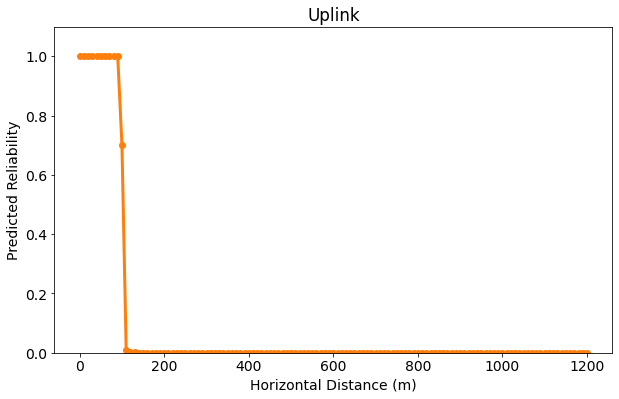

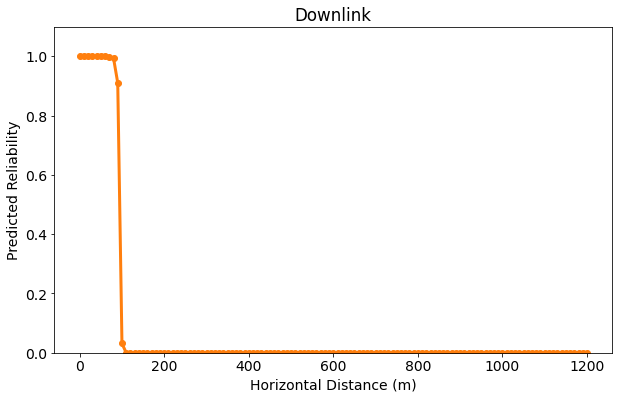

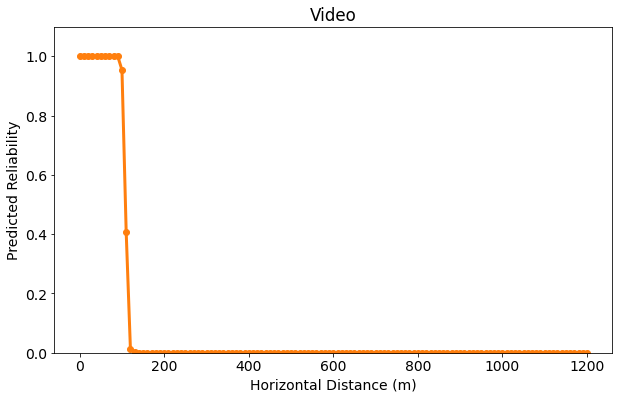

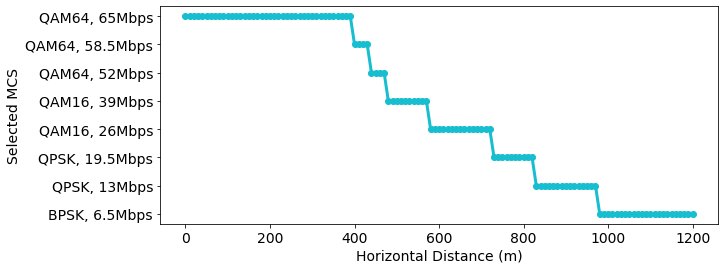

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSVs
snr_based = pd.read_csv("/home/research-student/omnet-fanet/data-processing-scripts/mdp_policy/snr_based_MCS_height_120m_usi_100.csv")
snr_based.sort_values(["Horizontal_Distance"], inplace=True)

# Plot DL Reliability
h_dist = snr_based["Horizontal_Distance"].values
snr_dl_reliability = snr_based["DL_Reliability"].values
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.plot(h_dist, snr_dl_reliability, '-o', c="tab:orange", linewidth=3, label="SNR-Based")
plt.ylim([0, 1.1])
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Predicted Reliability")
plt.title("Uplink")

# Plot UL Reliability
h_dist = snr_based["Horizontal_Distance"].values
snr_ul_reliability = snr_based["UL_Reliability"].values
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.plot(h_dist, snr_ul_reliability, '-o', c="tab:orange", linewidth=3, label="SNR-Based")
plt.ylim([0, 1.1])
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Predicted Reliability")
plt.title("Downlink")

# Plot DL Reliability
h_dist = snr_based["Horizontal_Distance"].values
snr_vid_reliability = snr_based["Vid_Reliability"].values
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.plot(h_dist, snr_vid_reliability, '-o', c="tab:orange", linewidth=3, label="SNR-Based")
plt.ylim([0, 1.1])
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Predicted Reliability")
plt.title("Video")

# Plot MCS
snr_mcs_index = snr_based["MCS"]
plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size': 14})
plt.plot(h_dist, snr_mcs_index, '-o', c="tab:cyan", linewidth=3, label="SNR-Based")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Selected MCS")
plt.yticks([0,1,2,3,4,5,6,7], ("BPSK, 6.5Mbps", "QPSK, 13Mbps", "QPSK, 19.5Mbps", "QAM16, 26Mbps", "QAM16, 39Mbps", "QAM64, 52Mbps", "QAM64, 58.5Mbps", "QAM64, 65Mbps"))
# plt.yticks([0,1,2,3], ("BPSK, 6.5Mbps", "QPSK, 13Mbps", "QPSK, 19.5Mbps", "QAM16, 26Mbps"))



## Plot MDP vs SNR-Based Comparison

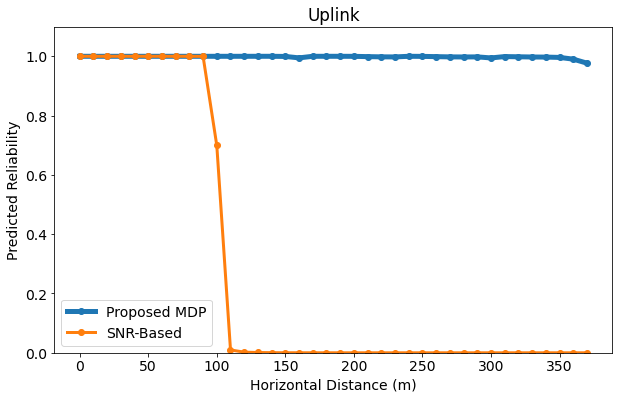

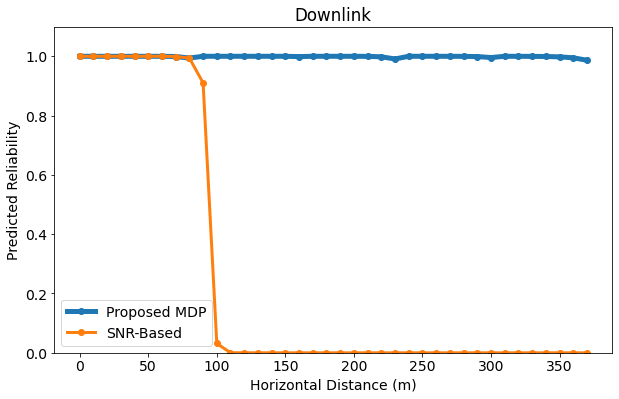

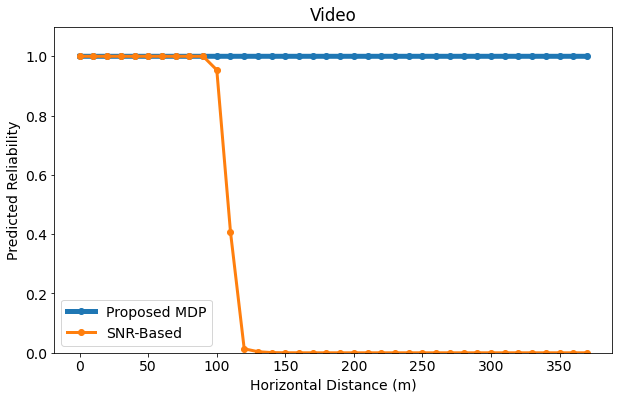

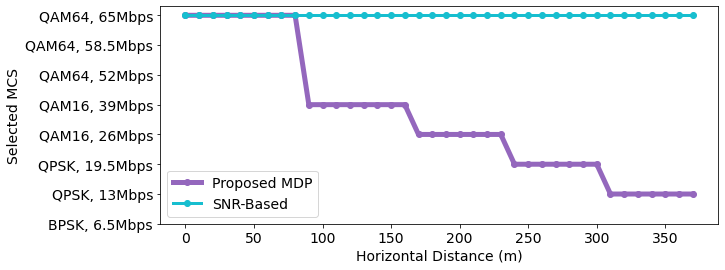

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# link = "Video"
# Load the CSVs
mdp_sim = pd.read_csv("/home/research-student/omnet-fanet/data-processing-scripts/mdp_policy/constant_height_120m_constant_usi_100ms_policy.csv")
mdp_sim.sort_values(["Horizontal_Distance"], inplace=True)
snr_based = pd.read_csv("/home/research-student/omnet-fanet/data-processing-scripts/mdp_policy/snr_based_MCS_height_120m_usi_100.csv")
snr_based = snr_based.loc[snr_based["Horizontal_Distance"] <= mdp_sim["Horizontal_Distance"].max()]

# Plot DL Reliability
h_dist = mdp_sim["Horizontal_Distance"].values
dl_reliability = mdp_sim["DL_Reliability"].values
snr_dl_reliability = snr_based["DL_Reliability"].values
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.plot(h_dist, dl_reliability, '-o', c="tab:blue", linewidth=5, label="Proposed MDP")
plt.plot(h_dist, snr_dl_reliability, '-o', c="tab:orange", linewidth=3, label="SNR-Based")
plt.ylim([0, 1.1])
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Predicted Reliability")
plt.legend(loc='lower left')
plt.title("Uplink")

# Plot UL Reliability
h_dist = mdp_sim["Horizontal_Distance"].values
ul_reliability = mdp_sim["UL_Reliability"].values
snr_ul_reliability = snr_based["UL_Reliability"].values
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.plot(h_dist, ul_reliability, '-o', c="tab:blue", linewidth=5, label="Proposed MDP")
plt.plot(h_dist, snr_ul_reliability, '-o', c="tab:orange", linewidth=3, label="SNR-Based")
plt.ylim([0, 1.1])
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Predicted Reliability")
plt.legend(loc='lower left')
plt.title("Downlink")

# Plot DL Reliability
h_dist = mdp_sim["Horizontal_Distance"].values
vid_reliability = mdp_sim["Vid_Reliability"].values
snr_vid_reliability = snr_based["Vid_Reliability"].values
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.plot(h_dist, vid_reliability, '-o', c="tab:blue", linewidth=5, label="Proposed MDP")
plt.plot(h_dist, snr_vid_reliability, '-o', c="tab:orange", linewidth=3, label="SNR-Based")
plt.ylim([0, 1.1])
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Predicted Reliability")
plt.legend(loc='lower left')
plt.title("Video")

# Plot MCS
# mcs_index = mdp_sim["Bitrate"].replace({6.5:0, 13:1, 19.5:2, 26:3, 39:4, 52:5, 58.5:6, 65:7}).values + 1 # Plus one for plotting purposes
mcs_index = mdp_sim["MCS"]
snr_mcs_index = snr_based["MCS"]
plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size': 14})
plt.plot(h_dist, mcs_index, '-o', c="tab:purple", linewidth=5, label="Proposed MDP")
plt.plot(h_dist, snr_mcs_index, '-o', c="tab:cyan", linewidth=3, label="SNR-Based")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Selected MCS")
plt.yticks([0,1,2,3,4,5,6,7], ("BPSK, 6.5Mbps", "QPSK, 13Mbps", "QPSK, 19.5Mbps", "QAM16, 26Mbps", "QAM16, 39Mbps", "QAM64, 52Mbps", "QAM64, 58.5Mbps", "QAM64, 65Mbps"))
# plt.yticks([0,1,2,3], ("BPSK, 6.5Mbps", "QPSK, 13Mbps", "QPSK, 19.5Mbps", "QAM16, 26Mbps"))
plt.legend(loc='lower left')

